### HEART DISEASE DATASET USING LINEAR REGRESSION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sn 

In [2]:
df=pd.read_csv(r"C:\Users\B-HONEST\OneDrive\Desktop\GO MINDZ\Heart_Disease_Prediction.csv")

In [3]:
df.head(10)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,0
7,7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


In [4]:
df.describe()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,134.500000,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.492593
std,78.086491,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.500874
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,67.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,134.500000,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,201.750000,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,269.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [5]:
metrix_cor = df.corr().abs()
print(metrix_cor)

                            index       Age       Sex  Chest pain type  \
index                    1.000000  0.041400  0.042656         0.015909   
Age                      0.041400  1.000000  0.094401         0.096920   
Sex                      0.042656  0.094401  1.000000         0.034636   
Chest pain type          0.015909  0.096920  0.034636         1.000000   
BP                       0.042879  0.273053  0.062693         0.043196   
Cholesterol              0.043509  0.220056  0.201647         0.090465   
FBS over 120             0.014714  0.123458  0.042140         0.098537   
EKG results              0.039836  0.128171  0.039253         0.074325   
Max HR                   0.102682  0.402215  0.076101         0.317682   
Exercise angina          0.064645  0.098297  0.180022         0.353160   
ST depression            0.084465  0.194234  0.097412         0.167244   
Slope of ST              0.023401  0.159774  0.050545         0.136900   
Number of vessels fluro  0.006128  0.3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

### SHOWING THE END PART OF THE DATASET

In [7]:
df.tail()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [8]:
df.describe()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,134.500000,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.492593
std,78.086491,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.500874
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,67.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,134.500000,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,201.750000,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,269.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


### CHECKING FOR MISSING VALUES

<Axes: >

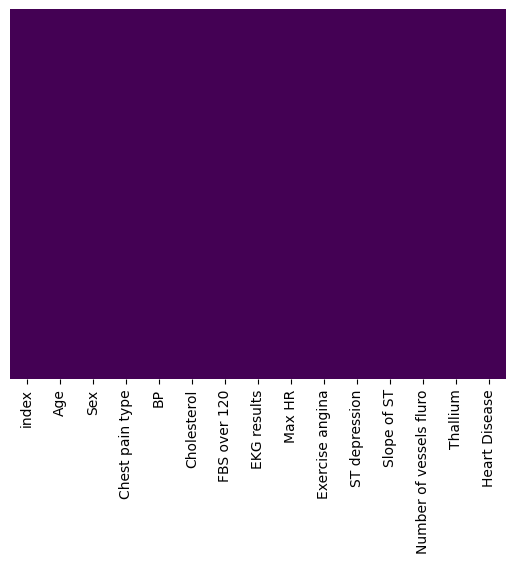

In [9]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### CORRELATION

In [10]:
print("The Correlation of Age and Cholesterol is:", df['Age'].corr(df['Cholesterol']))

print("The Correlation of Age and Age is:", df['Age'].corr(df['Sex']))

print("The Correlation of Age and Chest pain type is:", df['Age'].corr(df['Chest pain type']))

print("The Correlation of Sex and Age is:", df['Sex'].corr(df['Age']))

print("The Correlation of Sex and Sex is:", df['Sex'].corr(df['Sex']))

print("The Correlation of Sex and Chest pain type is:", df['Sex'].corr(df['Chest pain type']))



The Correlation of Age and Cholesterol is: 0.2200563076497444
The Correlation of Age and Age is: -0.09440068675836756
The Correlation of Age and Chest pain type is: 0.0969197629121222
The Correlation of Sex and Age is: -0.09440068675836757
The Correlation of Sex and Sex is: 1.0
The Correlation of Sex and Chest pain type is: 0.03463555337125098


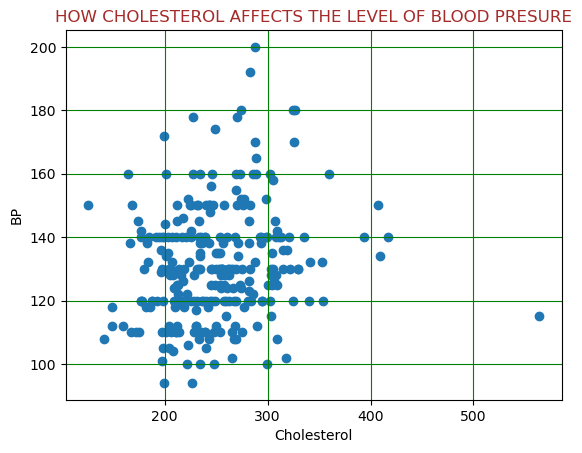

In [11]:
plt.scatter(df['Cholesterol'],df['BP'])
plt.xlabel ('Cholesterol')
plt.ylabel ('BP')
plt.title('HOW CHOLESTEROL AFFECTS THE LEVEL OF BLOOD PRESURE',color='brown')
plt.grid("fivethirtyeight", color = 'green')

plt.show()

### CONNVERTING  A CATEGORICAL COLUMN

In [12]:
df1=pd.get_dummies(['PB'],drop_first=True).head()

In [13]:
df=pd.concat([df1,df],axis=1)


In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,[5]]

In [15]:
df.head(10)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,0
7,7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


Text(0.5, 1.0, 'Data set Heatmap')

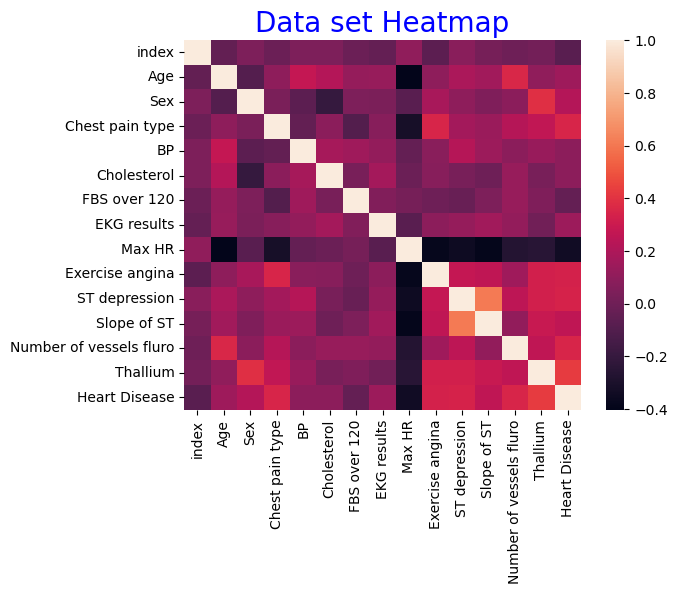

In [16]:
sns.heatmap(df.corr())
plt.title("Data set Heatmap", color = 'blue', fontsize = 20)

### PAIR PLOTS

C:\Users\B-HONEST\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


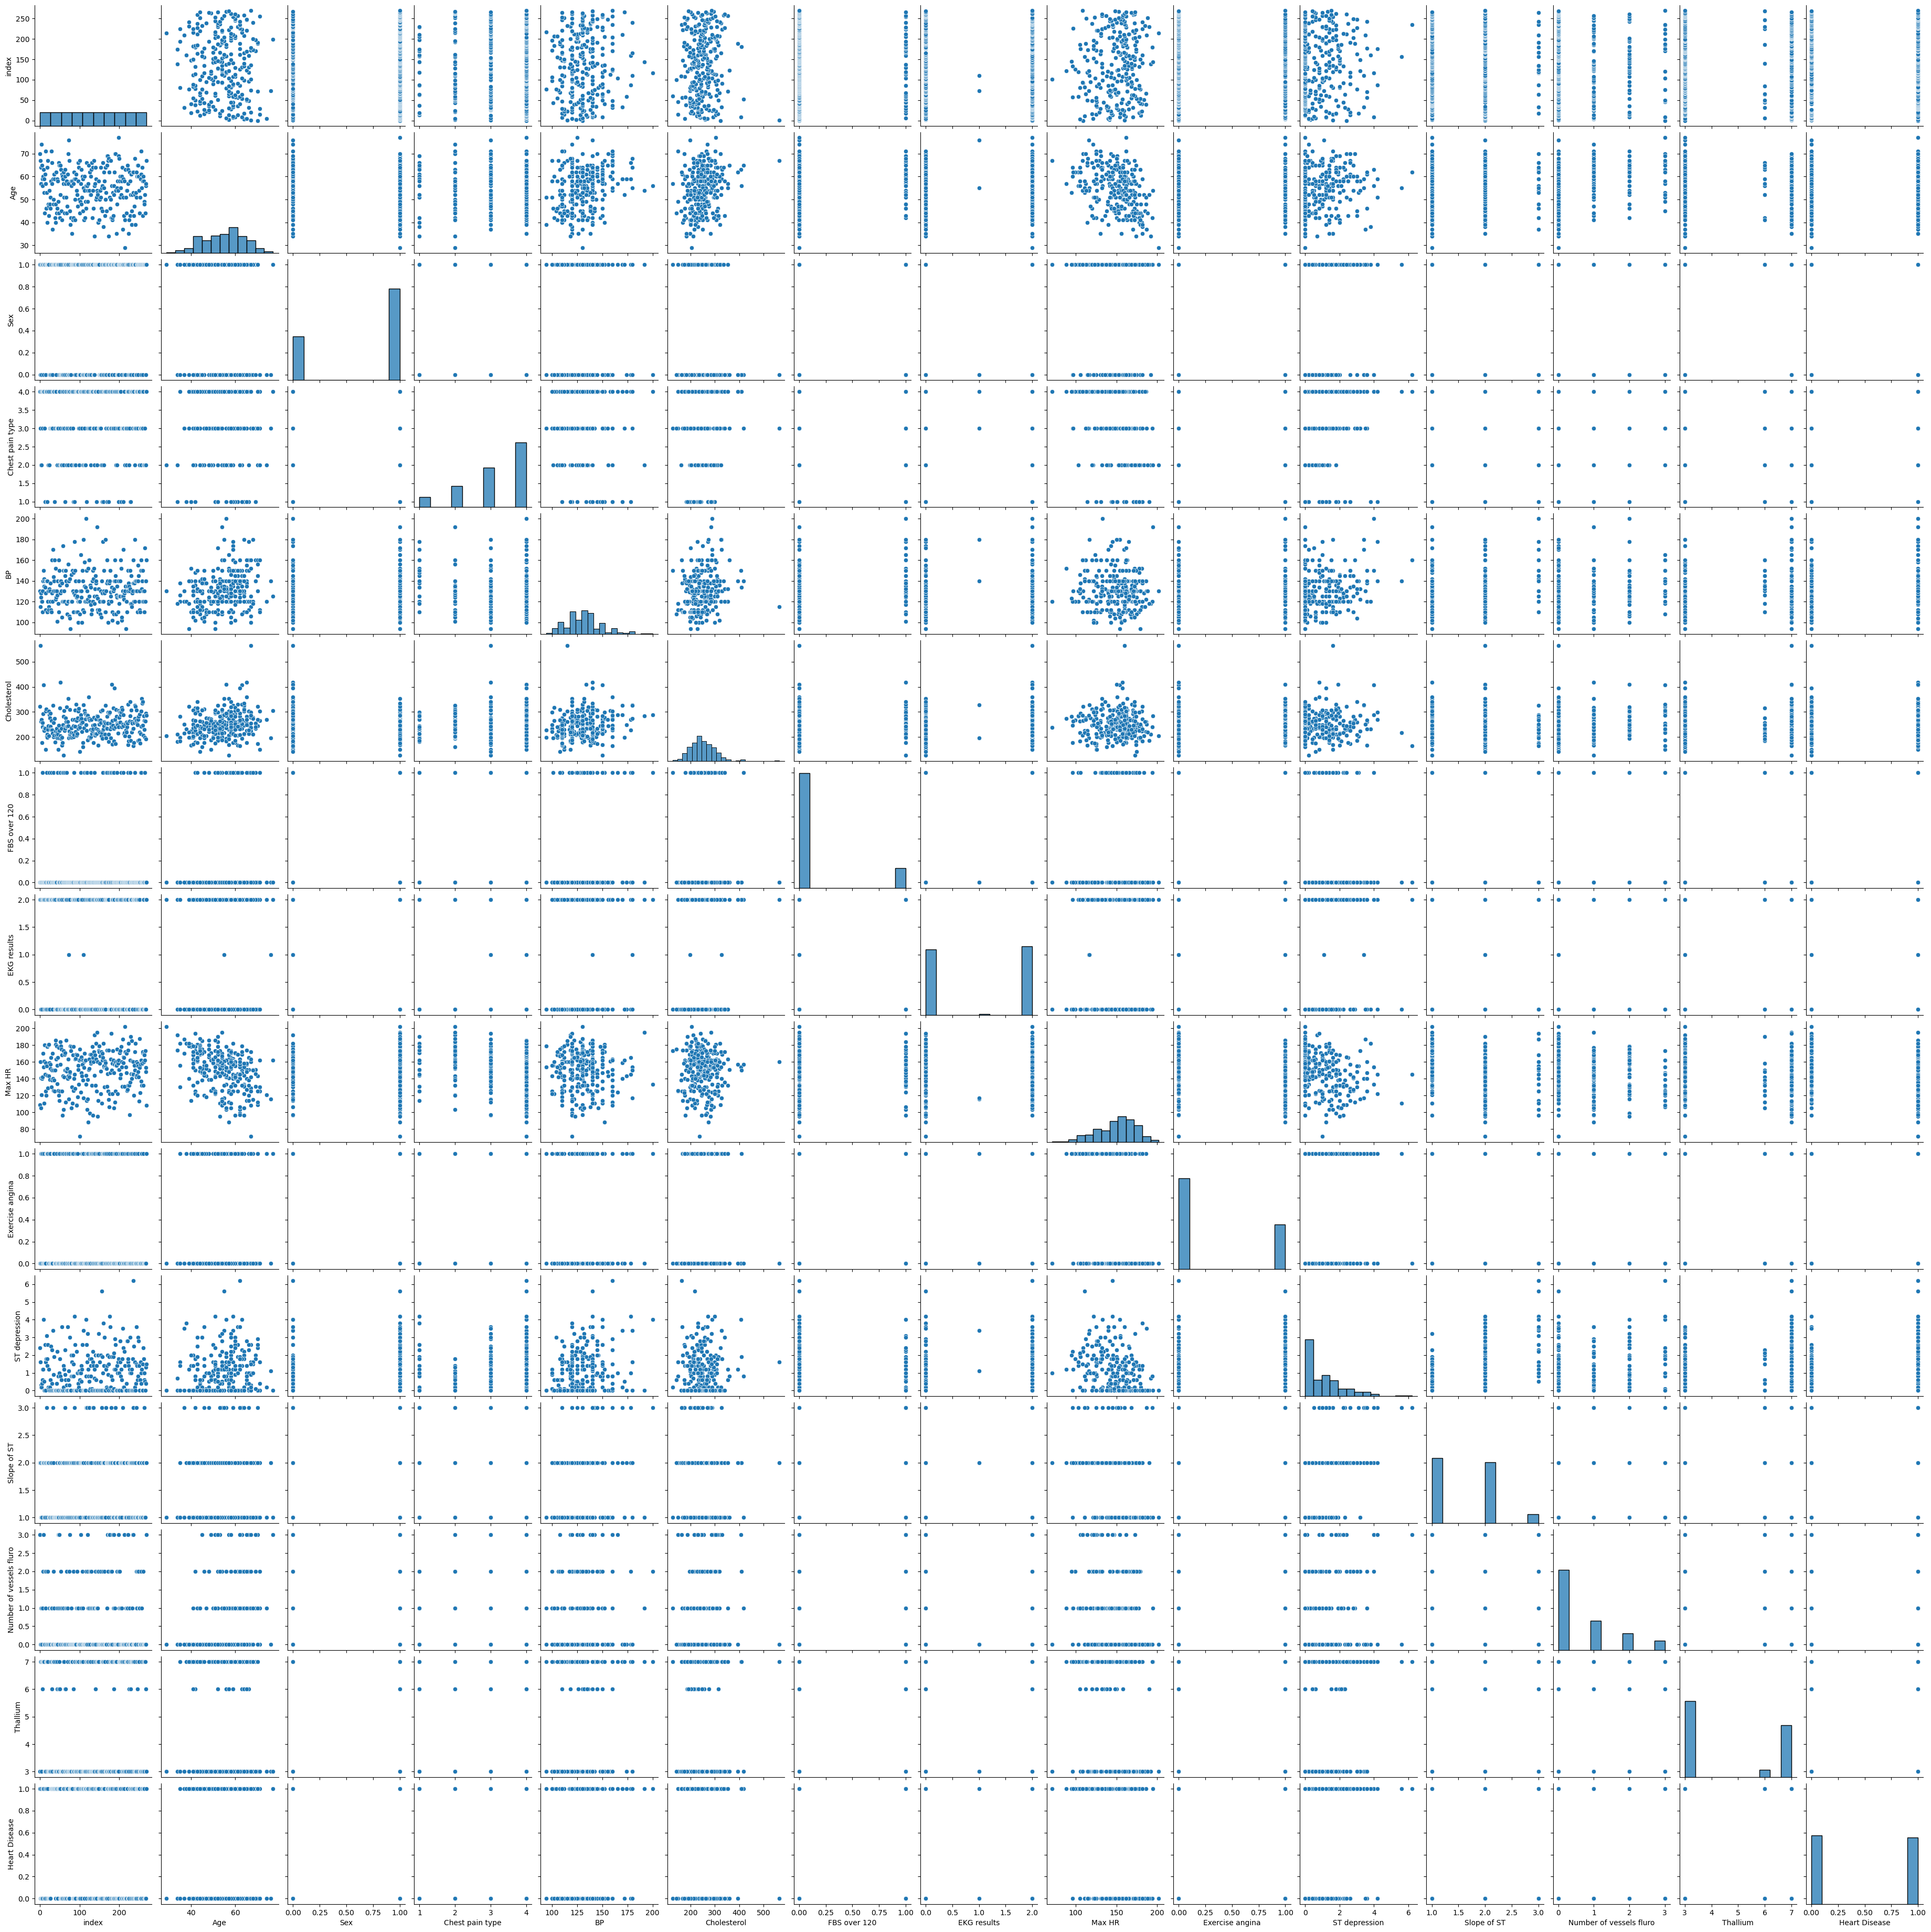

In [17]:
df=pd.read_csv(r"C:\Users\B-HONEST\OneDrive\Desktop\GO MINDZ\Heart_Disease_Prediction.csv")
sns.pairplot(df)

### DISPLAYING INDEPENDENT AND DEPENDENT FEATURES


INDEPENDENT FEATURE SHOULD BE A DATAFRAME OR 2 DIMENSIONAL ARRAY,FOR EXAMPLE

In [19]:
x = df_new = pd.read_csv(r"C:\Users\B-HONEST\OneDrive\Desktop\GO MINDZ\Heart_Disease_Prediction.csv")
x=df_new[['Cholesterol']]
y=df_new['BP'] 

In [20]:
x_series=['Cholesterol']
np.array(x_series).shape

(1,)

### X VARIABLE IN 2 DIMENTIONAL FORM

In [21]:
x

,Cholesterol
0,322
1,564
2,261
3,263
4,269
...,...
265,199
266,263
267,294
268,192


### Y variable  in series form

In [22]:
y_series=['BP']
np.array(y_series).shape

(1,)

In [23]:
y

0      130
1      115
2      124
3      128
4      120
      ... 
265    172
266    120
267    140
268    140
269    160
Name: BP, Length: 270, dtype: int64

### Y variable in 1 dimensional form

In [24]:
np.array(y).shape

(270,)

### X Variable in 2 Dimensional form

In [25]:
np.array(x).shape

(270, 1)

### TRAIN TEST SPLIT
TRAIN DATA{IS USED TO TRAIN THE DATA THAT WE HAVE}
TESTING {IS USED TO SEE HOW EFFECTIVE THE MODEL IS}

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### STANDARDIZATION
In LR we used gradient decent, if the x variable and dropping to the global minimum is gonna take time for standardization to get there. so, a good approach is, we take each independent feature and apply a simple formular called (Z_SCORE) which is going to convert all the values sorting it in this way, MEAN = 0 and STANDARD VEDIATION = 1

In [27]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

### DATA LEAKAGE
WE ARE NOT USING FIT_TRANSFORM OTHERWISE TEST DATA WILL KNOW ABOUT THE TRAIN DATA

In [28]:
x_test=scaler.transform(x_test)

In [29]:
x_test

array([[-4.04491214e-01],
       [-1.90797742e-02],
       [-2.69597210e-01],
       [-1.04042009e+00],
       [-3.83503462e-02],
       [-1.90797742e-02],
       [ 1.90797742e-04],
       [-7.51361509e-01],
       [-1.09823180e+00],
       [ 3.66331665e-01],
       [ 2.89249377e-01],
       [-1.11750238e+00],
       [ 1.75381285e+00],
       [ 3.85602237e-01],
       [ 1.44548370e+00],
       [ 9.65436576e-02],
       [ 2.50708233e-01],
       [-3.85220642e-01],
       [ 7.72730856e-02],
       [-2.38936013e+00],
       [ 7.72730856e-02],
       [ 2.50708233e-01],
       [-1.94613697e+00],
       [-3.27408926e-01],
       [ 1.25277798e+00],
       [ 3.02567060e+00],
       [ 1.02153111e+00],
       [ 1.04080168e+00],
       [-1.73416068e+00],
       [ 7.32472533e-01],
       [ 1.04080168e+00],
       [-1.53973778e-01],
       [ 6.36119673e-01],
       [-1.29093752e+00],
       [ 7.71013677e-01],
       [ 1.15814230e-01],
       [-1.19458466e+00],
       [ 1.32986026e+00],
       [ 6.3

### APPLY ML MODEL (LINEAR REGRESSION)

In [30]:
regression=LinearRegression(n_jobs=-1)

In [31]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

### FINDING OUR SLOPE

In [32]:
print('Coefficient or slope: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficient or slope:  [2.36817497]
Intercept:  131.46534653465346


The intercept is basically describing at what point is the 
slope line meeting the y axis

### PLOTTING THE TRAINING DATA 

Text(0.5, 0, 'X AXIS')

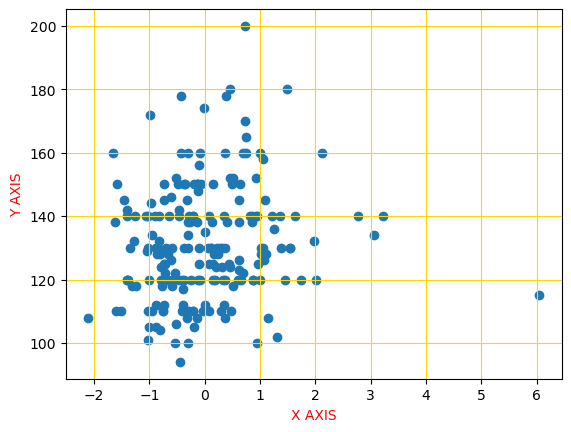

In [71]:
plt.scatter(x_train,y_train)
plt.grid("fivethirtyeight", color = "gold")
plt.ylabel("Y AXIS", color = "red")
plt.xlabel("X AXIS", color = "red")

Text(0.5, 0, 'X AXIS')

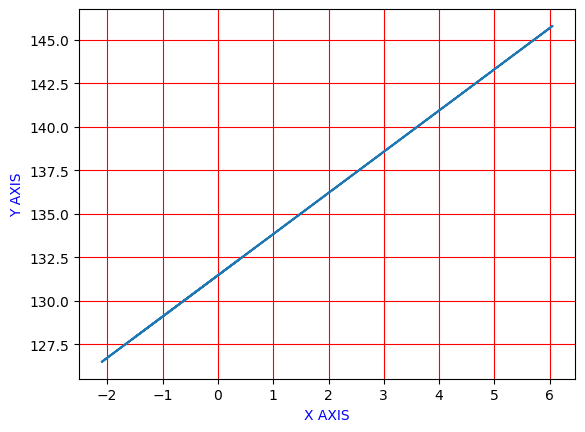

In [82]:
plt.plot(x_train,regression.predict(x_train))
plt.grid("fivethirtyeight", color = "red")
plt.ylabel("Y AXIS", color = "blue")
plt.xlabel("X AXIS", color = "blue")

In [79]:
x = df_new = pd.read_csv(r"C:\Users\B-HONEST\OneDrive\Desktop\GO MINDZ\Heart_Disease_Prediction.csv")
np.array(1, -1).reshape

TypeError: Cannot interpret '-1' as a data type

In [45]:
x = df = pd.read_csv(r"C:\Users\B-HONEST\OneDrive\Desktop\GO MINDZ\Heart_Disease_Prediction.csv")

plt.plot(y_train,x_train,regression.predict(y_train))

ValueError: Expected 2D array, got 1D array instead:
array=[110 140 110 120 135 158 160 128 105 100 118 130 130 110 130 124 125 120
 125 120 134 110 118 132 120 170 126 105 108 124 104 110 132 125 120 140
 145 120 120 106 200 110 130 108 130 150 130 120 138 150 138 110 150 128
 148 120 130 100 160 140 130 112 140 128 110 130 129 124 110 140 152 138
 110 138 178 130 118 108 140 125 140 140 130 112 122 150 142 140 145 120
 125 120 152 120 160 130 138 102 118 120 142 134 130 140 120 150 145 126
 132 140 152 160 130 112  94 128 120 122 180 110 125 110 138 150 101 123
 140 125 128 124 140 120 115 130 165 150 128 146 152 144 120 110 140 140
 130 180 130 130 117 140 150 140 134 120 140 112 140 110 156 150 150 145
 150 140 150 130 150 136 138 118 120 160 128 105 160 120 138 174 120 160
 126 160 130 120 140 120 172 108 145 112 108 120 120 178 130 122 160 120
 140 120 100 130].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### PREDICTION FOR THE TEST DATA

In [46]:
y_pred=regression.predict(x_test)

### PERFORMANCE METRICS

In [47]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)


rmse=np.sqrt(mse)
print('MEAN SQUARE ERROR:',(mse))
print('MEAN ABSOLUTE ERROR:',(mae))
print('RANDOM MEAN SQUARE ERROR:',(rmse))

MEAN SQUARE ERROR: 284.933673627789
MEAN ABSOLUTE ERROR: 12.510019996017341
RANDOM MEAN SQUARE ERROR: 16.879978484221745


In [48]:
score=r2_score(y_test,y_pred)
print('SCORE:',(score))

SCORE: 0.061855246069044134


### ADJUSTED R SQUARE

In [49]:
R2= 1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('Adjusted R2:',(R2))

Adjusted R2: 0.047640931615544835


In [50]:
model=sm.OLS(y_train,x_train).fit()

In [51]:
prediction=model.predict(x_test)
print('PREDICTION:',(prediction))

PREDICTION: [-9.57905966e-01 -4.51842437e-02 -6.38453363e-01 -2.46389681e+00
 -9.08203298e-02 -4.51842437e-02  4.51842437e-04 -1.77935552e+00
 -2.60080507e+00  8.67537479e-01  6.84993134e-01 -2.64644115e+00
  4.15333568e+00  9.13173565e-01  3.42315830e+00  2.28632273e-01
  5.93720962e-01 -9.12269880e-01  1.82996187e-01 -5.65842284e+00
  1.82996187e-01  5.93720962e-01 -4.60879286e+00 -7.75361622e-01
  2.96679744e+00  7.16531737e+00  2.41916441e+00  2.46480049e+00
 -4.10679591e+00  1.73462312e+00  2.46480049e+00 -3.64636847e-01
  1.50644268e+00 -3.05716593e+00  1.82589529e+00  2.74268359e-01
 -2.82898550e+00  3.14934179e+00  1.50644268e+00 -1.09481422e+00
  1.14135400e+00 -2.23571638e+00  2.64734484e+00 -2.32698855e+00
 -2.32698855e+00  9.17240147e-02 -1.32299466e+00  2.69298092e+00
 -2.00753595e+00 -4.55909019e-01 -4.60879286e+00  7.76265307e-01
  4.56812704e-01 -2.82898550e+00  9.58809651e-01  3.46879439e+00
 -1.82092502e-01 -7.75361622e-01 -1.64244726e+00  1.05008182e+00
  2.78425310e

### MODEL SUMMARY

This helps us to know whether our results in our model is the same with the summary data

In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     BP   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                            0.06405
Date:                Thu, 21 Mar 2024   Prob (F-statistic):                       0.800
Time:                        20:53:44   Log-Likelihood:                         -1274.0
No. Observations:                 202   AIC:                                      2550.
Df Residuals:                     201   BIC:                                      2553.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### INSERTING NEW DATA TO THE MODEL

According to WHO, Individuals with cholesteral level higher 
than 190 are at higher risk of getting heart diseases

## CHOLESTORAL LEVELS
levels ranges from 140mg/dl to 200mg/dl

when it reaches 300 OR higher, an individual is at 

high risk of getting heart disease

### BLOOD PRESURE LEVELS


idealblood pressure ranges from 90/60 mmHg and 120/80 mmHg

when BP reaches 14O/90 or exceeds, an individual is at 

high risk of high blood pressure



In [54]:
result=regression.predict(scaler.transform([[200]]))
result=np.format_float_positional(result, precision=0)
print('BLOOD PRESURE SCORE IS:',result, 'mmHg',)


BLOOD PRESURE SCORE IS: 129. mmHg


C:\Users\B-HONEST\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
